<a href="https://colab.research.google.com/github/TrushaaPandya/Trushaa-s-Business-Analysis-Projects/blob/main/HR_Attrition_Dataset_1(Numerical).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name- Trushaa Pandya | Roll no. 12 | Business Analytics

---


Research Paper Project

# **Predicting Employee Attrition and Factors using Multiple Linear Regression using Ordinary Least Squares(OLS)**

**Importing Libraries and Loading the File-**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
data_to_upload=files.upload()

Saving Employee Attrition numerical dataset.csv to Employee Attrition numerical dataset.csv


In [ ]:
df=pd.read_csv('Employee Attrition numerical dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,Education Field,Employee Count,Employee Number,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Years With Curr Manager
0,41,1,2,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,3,279,2,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,2,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,3,1392,2,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,2,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   Education Field           1470 non-null   int64
 8   Employee Count            1470 non-null   int64
 9   Employee Number           1470 non-null   int64
 10  Environment Satisfaction  1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  Hourly Rate               1470 non-null   int64
 13  Job Involvement           1470 non-null   int64
 14  JobLevel                  1470 non-null 

**Handling Null Values-**

In [ ]:
df=df.dropna()
df.shape

(1470, 35)

**Splitting the Data-**

In [ ]:
output_col='Attrition'

In [ ]:
x=df.iloc[:,df.columns !=output_col]
print(x)

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               2       1102           1                 1          2   
1      49               3        279           2                 8          1   
2      37               2       1373           2                 2          2   
3      33               3       1392           2                 3          4   
4      27               2        591           2                 2          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               3        884           2                23          2   
1466   39               2        613           2                 6          1   
1467   27               2        155           2                 4          3   
1468   49               3       1023           1                 2          3   
1469   34               2        628           2                 8          3   

      Education Field  Empl

In [ ]:
y=df.loc[:,output_col]
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Example 80-20 train-test split with a fixed random seed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,Education Field,Employee Count,Employee Number,Environment Satisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Years With Curr Manager
1097,24,2,350,2,21,2,4,1,1551,3,...,2,80,3,2,3,3,1,1,0,0
727,18,1,287,2,5,2,0,1,1012,2,...,4,80,0,0,2,3,0,0,0,0
254,29,2,1247,1,20,2,3,1,349,4,...,4,80,1,10,2,3,3,2,0,2
1175,39,2,492,2,12,3,1,1,1654,4,...,3,80,0,7,3,3,5,4,1,0
1341,31,2,311,2,20,3,0,1,1881,2,...,1,80,1,10,2,3,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,2,750,2,28,3,0,1,1596,2,...,4,80,2,10,3,2,10,9,6,8
1294,41,2,447,2,5,3,0,1,1814,2,...,1,80,0,11,3,1,3,2,1,2
860,22,3,1256,2,3,4,0,1,1203,3,...,2,80,1,1,5,3,0,0,0,0
1459,29,2,1378,2,13,2,5,1,2053,4,...,1,80,1,10,2,3,4,3,0,3


In [ ]:
y_train

1097    0
727     0
254     0
1175    0
1341    0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: Attrition, Length: 1176, dtype: int64

# **Linear Regression**

Training model

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-3.70971343e-03,  8.31769689e-02, -2.26360262e-05, -5.24820152e-02,
        3.43107571e-03,  4.30506521e-03,  1.15450510e-02, -1.35742112e-15,
        4.40218670e-06, -3.72014493e-02, -3.90614453e-02,  4.65322871e-05,
       -5.65760302e-02, -4.58719602e-02,  4.96398955e-04, -3.85883966e-02,
       -4.55038857e-03,  2.13737390e-06,  1.05012058e-06,  2.01163338e-02,
       -1.38777878e-17,  2.26785997e-01, -2.14008074e-03,  5.75312023e-03,
       -1.38768752e-02,  1.38777878e-17, -5.95702668e-02, -3.24073182e-03,
       -8.44661971e-03, -2.73280291e-02,  8.12348875e-03, -1.42863166e-02,
        1.18731617e-02, -9.73504850e-03])

In [ ]:
lr.intercept_

0.7496251517059471

**Predicted Test Input**

In [ ]:
predicted_value=lr.predict(x_test)
predicted_value

array([ 0.13947962, -0.13044448,  0.23619198,  0.02561463,  0.02628991,
        0.27100807,  0.25710988, -0.00465621,  0.08395664, -0.04842153,
        0.31716124,  0.08166295,  0.22427917,  0.07307905,  0.0696356 ,
        0.18777863,  0.37065385,  0.09311657,  0.2880685 ,  0.22539105,
        0.34229029, -0.11637073,  0.12525522,  0.43040252,  0.25163991,
        0.02644777,  0.15569937,  0.05352848,  0.15495721,  0.14831766,
        0.04099796, -0.08241959, -0.09041496, -0.01048455,  0.46125274,
       -0.07301589, -0.10597856,  0.3610462 ,  0.43109805,  0.08880986,
        0.13075325,  0.27096726,  0.08027807,  0.21597756,  0.4125561 ,
       -0.05379206,  0.49890133,  0.40365018,  0.41778397,  0.46461735,
        0.09657178,  0.26528277, -0.03490241,  0.17225226,  0.1771503 ,
        0.21992291,  0.31412193, -0.13763877,  0.15632626,  0.20064704,
       -0.06261307,  0.3334737 ,  0.02894175, -0.1100285 ,  0.41531414,
        0.5315538 ,  0.07030285,  0.29986224, -0.02694104,  0.15

In [ ]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(y_test, predicted_value)
cost

0.10194870776681556

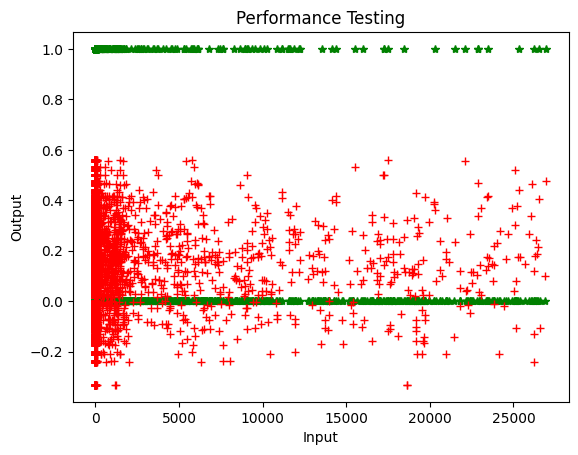

In [ ]:
plt.plot(x_test,y_test,'*',color="green")
plt.plot(x_test,predicted_value,'+',color='red')
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [ ]:
x_with_constant=sm.add_constant(x_train)
x_with_constant

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,Education Field,Employee Count,Employee Number,Environment Satisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Years With Curr Manager
1097,24,2,350,2,21,2,4,1,1551,3,...,2,80,3,2,3,3,1,1,0,0
727,18,1,287,2,5,2,0,1,1012,2,...,4,80,0,0,2,3,0,0,0,0
254,29,2,1247,1,20,2,3,1,349,4,...,4,80,1,10,2,3,3,2,0,2
1175,39,2,492,2,12,3,1,1,1654,4,...,3,80,0,7,3,3,5,4,1,0
1341,31,2,311,2,20,3,0,1,1881,2,...,1,80,1,10,2,3,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,2,750,2,28,3,0,1,1596,2,...,4,80,2,10,3,2,10,9,6,8
1294,41,2,447,2,5,3,0,1,1814,2,...,1,80,0,11,3,1,3,2,1,2
860,22,3,1256,2,3,4,0,1,1203,3,...,2,80,1,1,5,3,0,0,0,0
1459,29,2,1378,2,13,2,5,1,2053,4,...,1,80,1,10,2,3,4,3,0,3


In [ ]:
model=sm.OLS(y_train,x_with_constant)

In [ ]:
result=model.fit()
result.params

Age                        -0.003710
BusinessTravel              0.083177
DailyRate                  -0.000023
Department                 -0.052482
DistanceFromHome            0.003431
Education                   0.004305
Education Field             0.011545
Employee Count              0.000117
Employee Number             0.000004
Environment Satisfaction   -0.037201
Gender                     -0.039061
Hourly Rate                 0.000047
Job Involvement            -0.056576
JobLevel                   -0.045872
JobRole                     0.000496
JobSatisfaction            -0.038588
MaritalStatus              -0.004550
MonthlyIncome               0.000002
MonthlyRate                 0.000001
NumCompaniesWorked          0.020116
Over18                      0.000117
OverTime                    0.226786
PercentSalaryHike          -0.002140
PerformanceRating           0.005753
RelationshipSatisfaction   -0.013877
StandardHours               0.009367
StockOptionLevel           -0.059570
T

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     11.70
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.59e-49
Time:                        06:34:46   Log-Likelihood:                -350.76
No. Observations:                1176   AIC:                             765.5
Df Residuals:                    1144   BIC:                             927.7
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                     

In [ ]:
x_test=sm.add_constant(x_test)
y_pred=result.predict(x_test)

In [ ]:
residual=y_test - y_pred
residual

1041   -0.139480
184     0.130444
1222    0.763808
67     -0.025615
220    -0.026290
          ...   
567    -0.043059
560    -0.155716
945    -0.267740
522    -0.069038
651    -0.186546
Length: 294, dtype: float64

In [ ]:
np.mean(residual)

-0.013906691245231194